<a href="https://colab.research.google.com/github/Etanng/Kuggle/blob/main/%EC%BF%A0%EA%B8%80_%EB%B6%84%EB%A5%98_%EA%B3%BC%EC%A0%9C_%EC%9D%B4%ED%83%9C%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로딩

In [31]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head() ## 파일이 잘 불러와졌는지 확인

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


## 간단한 EDA(탐색적 자료분석)

In [33]:
# training data info
train.info()
train.describe()
# 결측값 존재여부 확인 - 존재X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [34]:
# test data info
test.info()
test.describe()
#결측값 존재여부 확인 - 존재X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,7.243850,0.347930,0.319130,5.47160,0.057275,31.117000,116.723500,0.994825,3.213000,0.535360,10.419693
std,288.819436,1.344372,0.172043,0.146561,4.76628,0.037048,18.156527,57.808145,0.002912,0.161165,0.145525,1.180694
min,0.000000,4.200000,0.080000,0.000000,0.70000,0.014000,1.000000,7.000000,0.988150,2.720000,0.230000,8.400000
25%,249.750000,6.400000,0.230000,0.240000,1.80000,0.039000,17.750000,76.750000,0.992448,3.100000,0.437500,9.500000
50%,499.500000,7.000000,0.300000,0.300000,2.90000,0.048000,29.000000,118.500000,0.995130,3.200000,0.510000,10.200000
75%,749.250000,7.700000,0.410000,0.392500,8.20000,0.067250,42.000000,156.000000,0.997060,3.312500,0.620000,11.200000
max,999.000000,15.600000,1.240000,0.810000,22.60000,0.611000,122.500000,289.000000,1.003150,3.780000,1.310000,14.000000


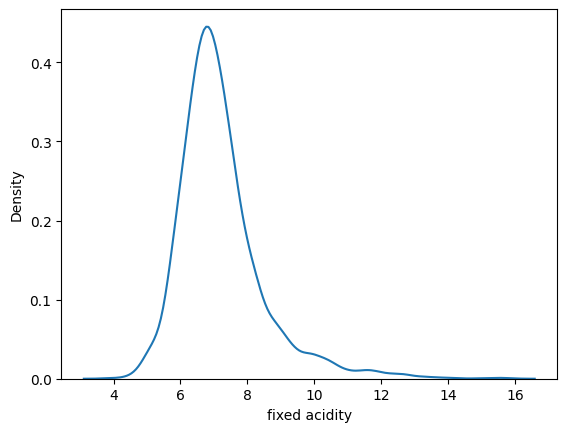

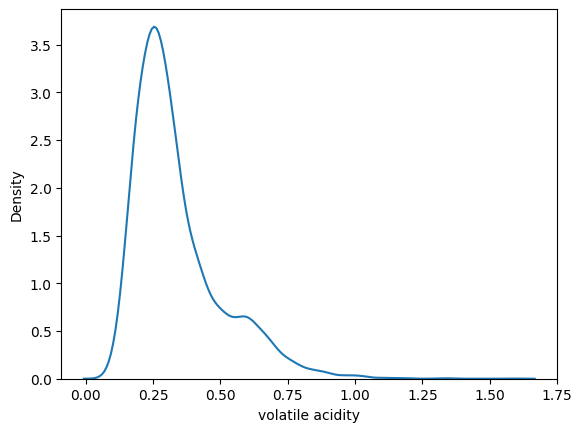

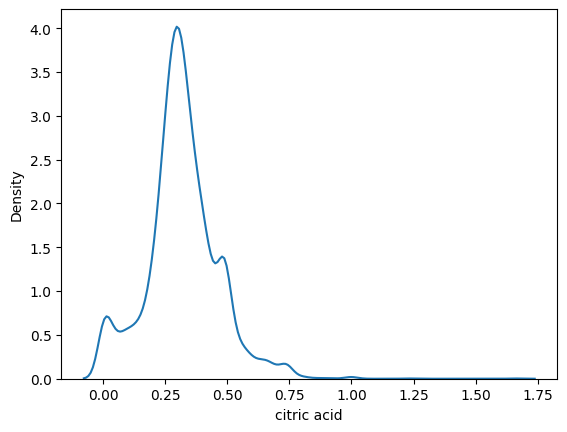

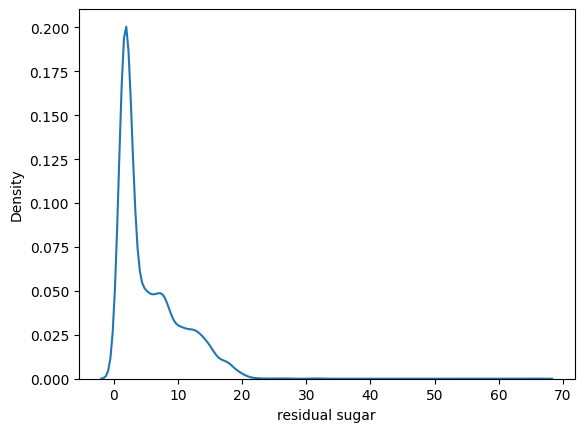

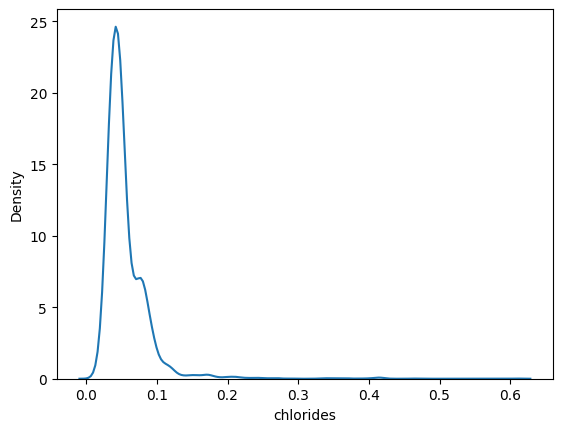

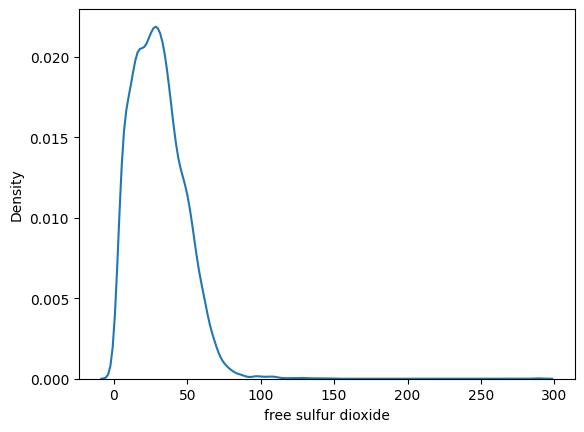

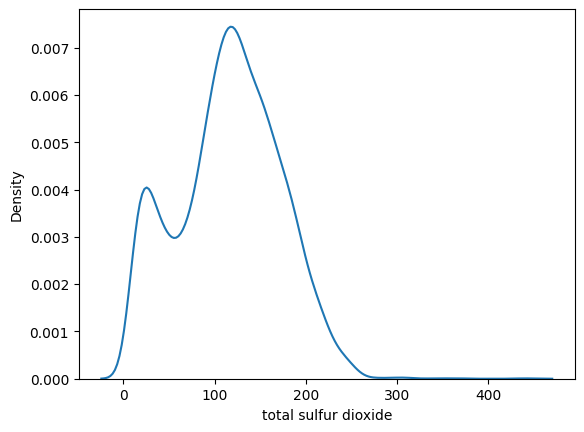

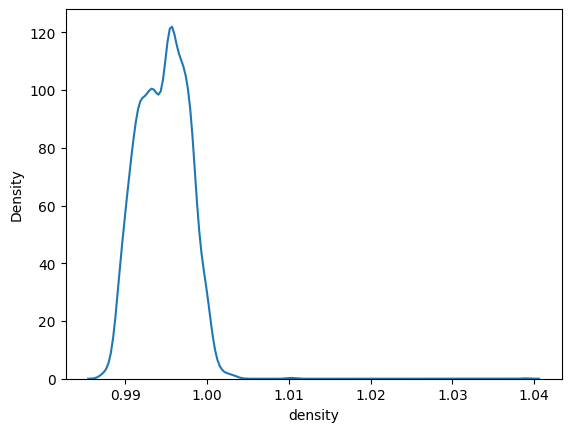

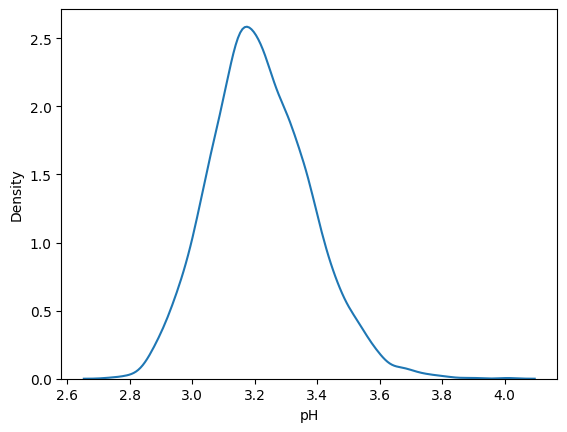

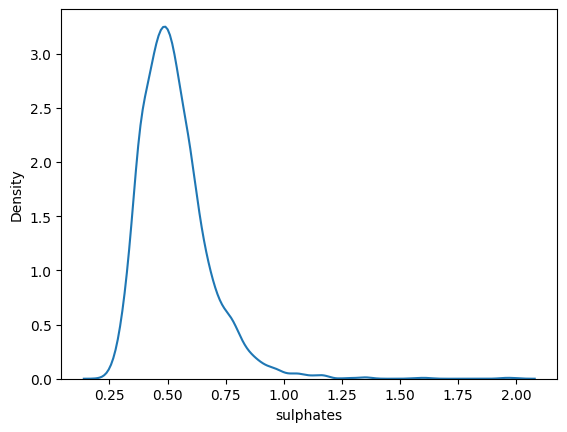

In [35]:
import seaborn as sns

# kde plot을 그려 분포를 확인하시오
for i in range(2,12):
  sns.kdeplot(train.iloc[:,i])
  plt.show()

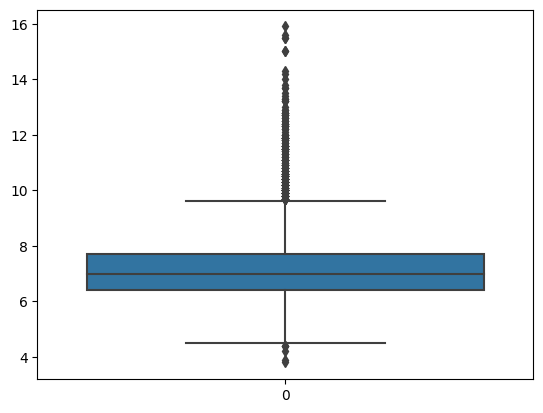

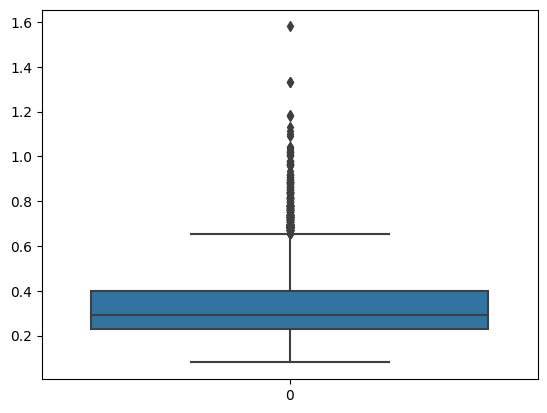

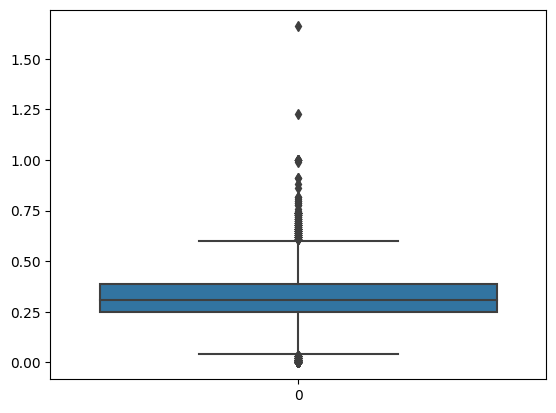

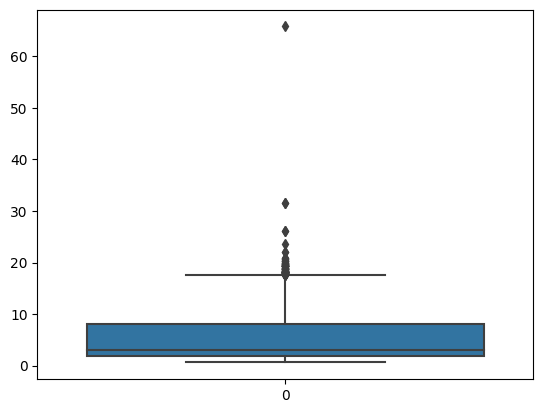

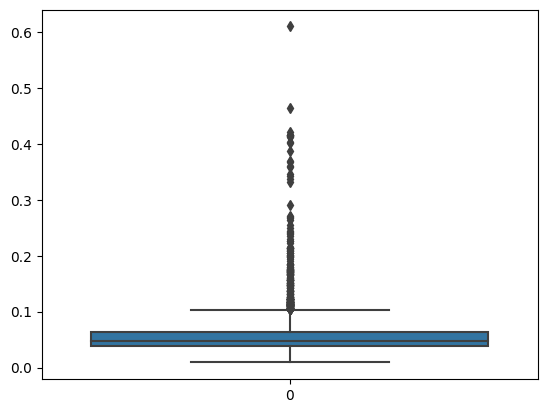

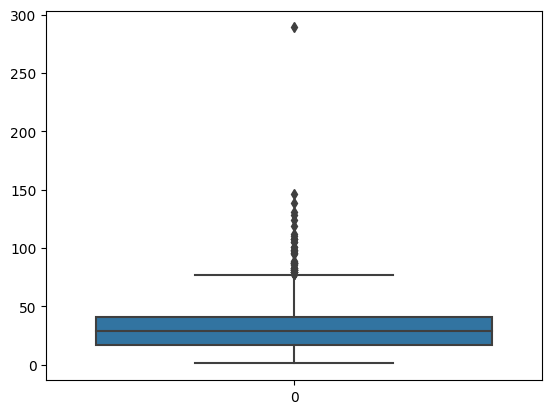

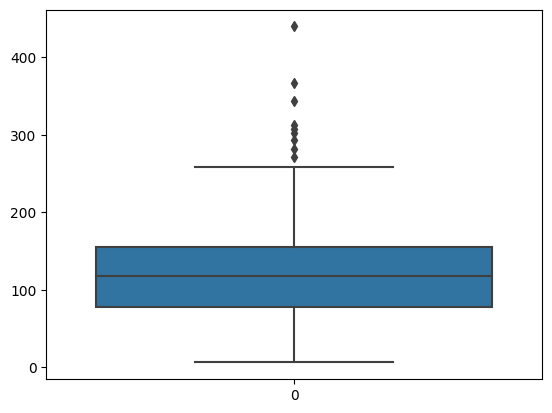

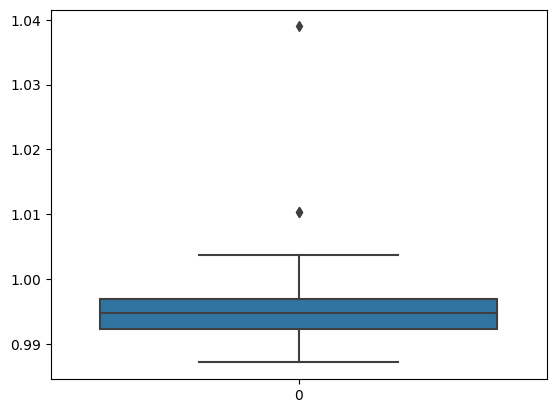

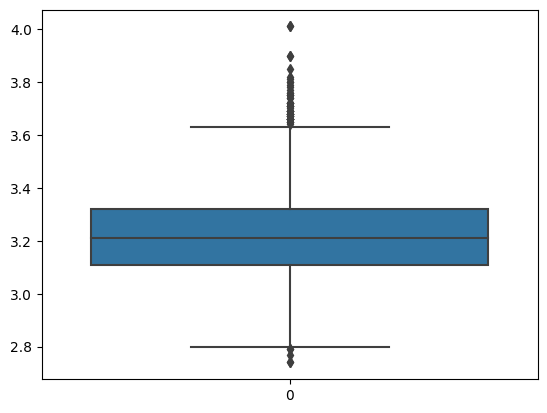

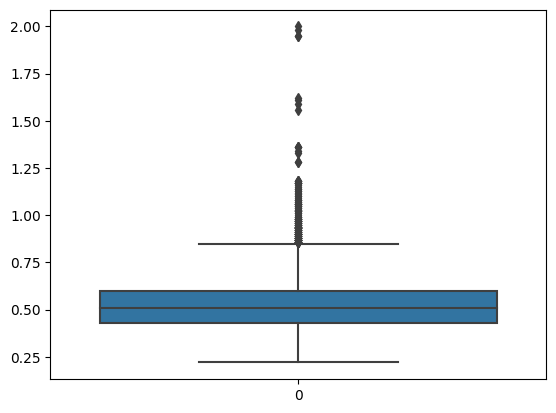

In [36]:
import seaborn as sns

# box plot을 그려 분포를 확인하시오
for i in range(2,12):
  sns.boxplot(train.iloc[:,i])
  plt.show()

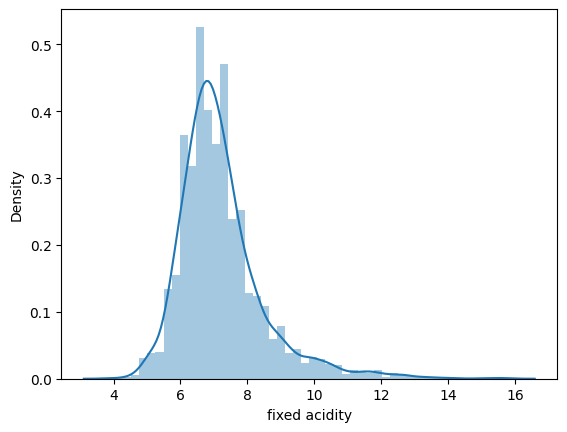

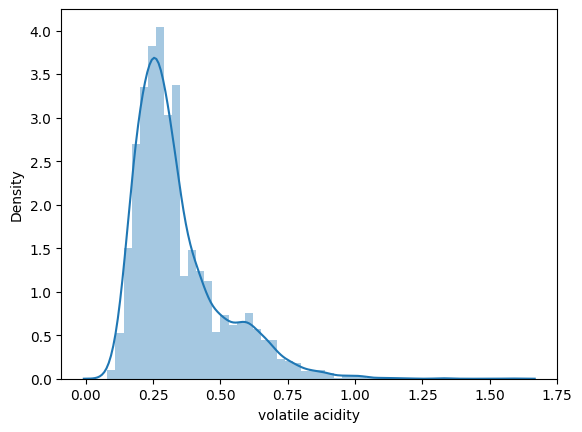

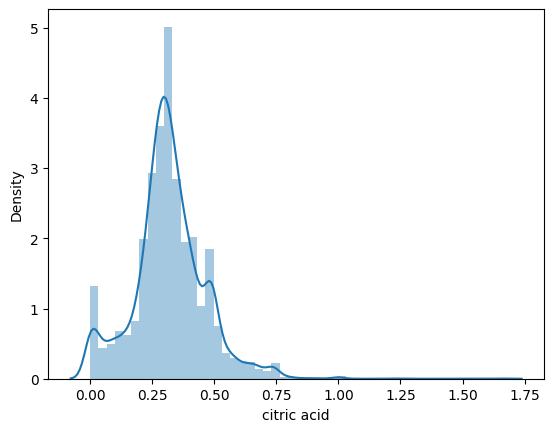

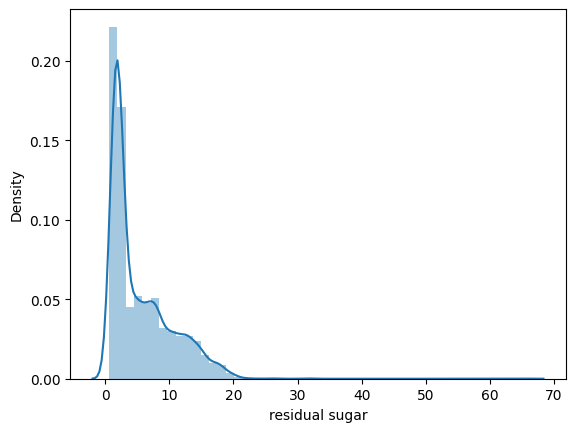

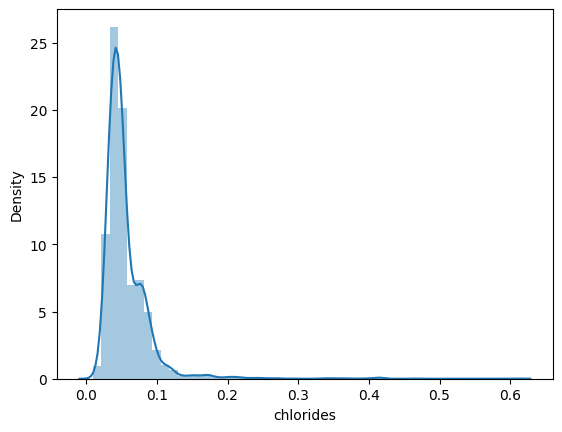

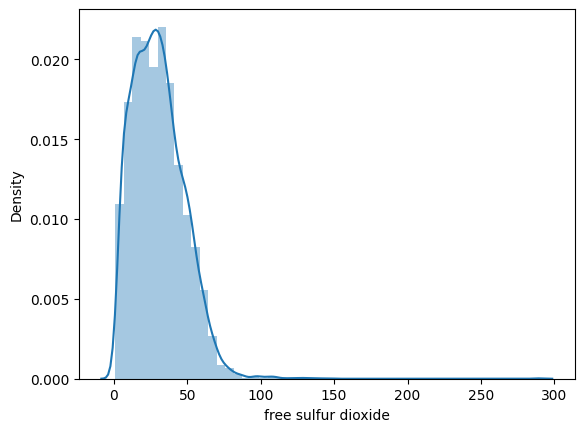

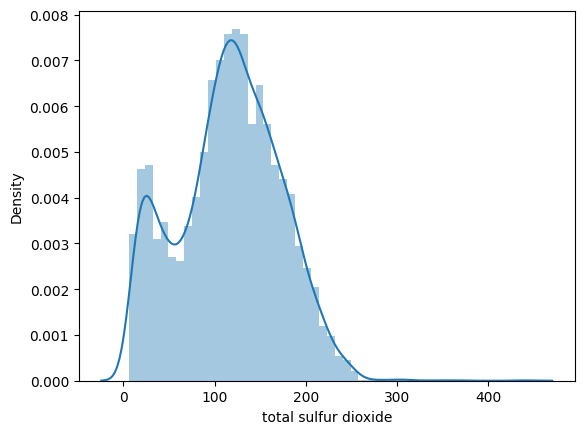

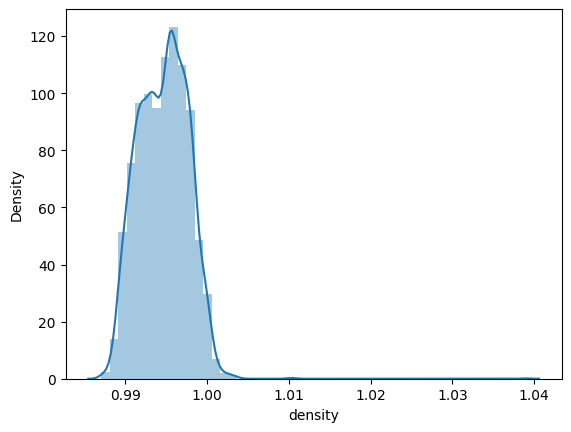

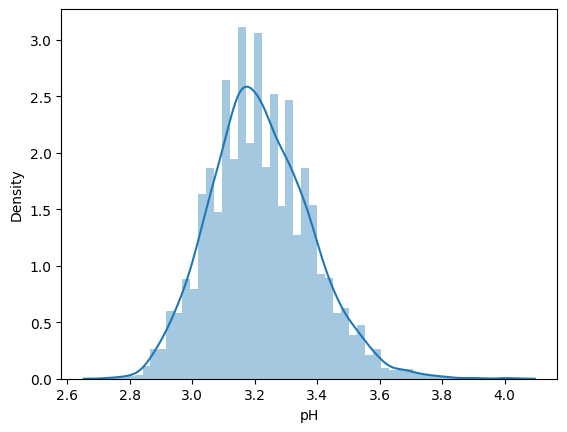

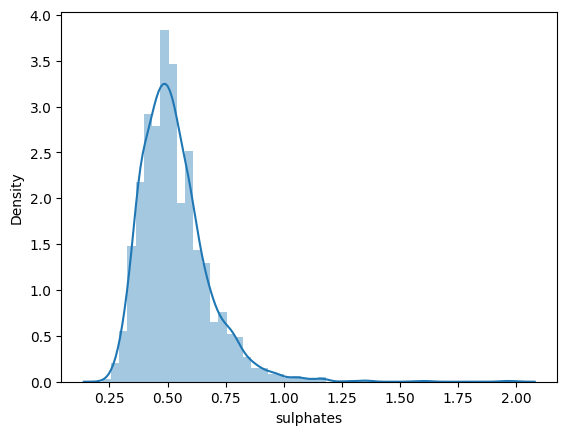

In [37]:
# distribution plot을 그려 변수별 분포를 확인하시오
for i in range(2,12):
  sns.distplot(train.iloc[:,i])
  plt.show()

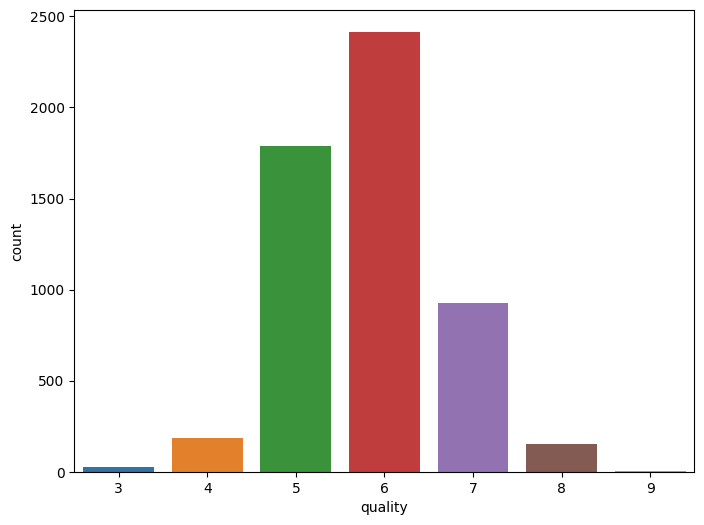

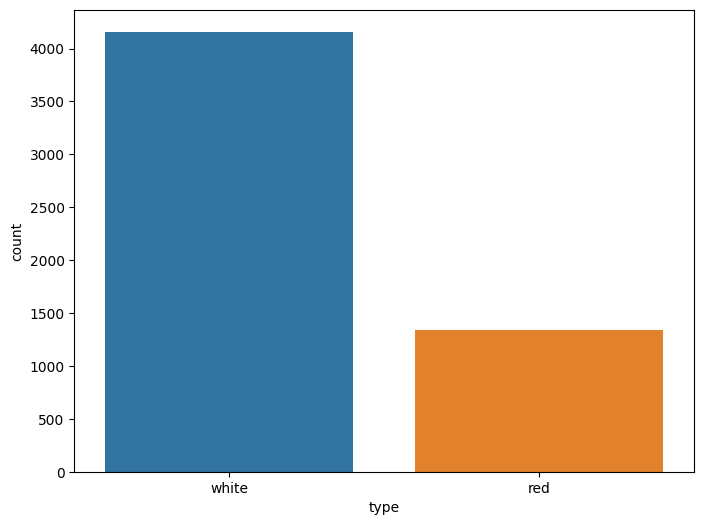

In [38]:
# barplots for categorical plots('quality', 'type') 범주형 변수 분포 확인하시오
# 코드작성
# Barplot 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='quality')

# Barplot 'type'
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='type')

plt.show()


## 데이터 전처리

In [39]:
# 코드를 완성해 데이터 중복값 확인하시오
train.duplicated().sum()#코드추가

# 중복값 없음

0

In [40]:
# 코드를 완성해 범주형 변수 인코딩하시오
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train['type']=encoder.fit_transform(train['type'])#코드추가

In [41]:
train['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [42]:
# Test data 역시 인코딩
test['type']=encoder.fit_transform(test['type'])#코드추가

In [43]:
test['type'].value_counts()

1    739
0    261
Name: type, dtype: int64

In [44]:
import numpy as np

# EDA 결과를 바탕으로 이상치 처리를 위한 함수를 정의하시오
def outlier(df):
    Q1 = np.percentile(df, 25)
    Q3 = np.percentile(df, 75)

    # IQR(Interquartile Range) 계산
    IQR = Q3 - Q1

    # 이상치의 최솟값과 최댓값 계산
    line_down = Q1 - 1.5 * IQR
    line_up = Q3 + 1.5 * IQR

    df = df.clip(line_down, line_up)

    return df

for i in range(2,12):
    train.iloc[:,i] = outlier(train.iloc[:,i])

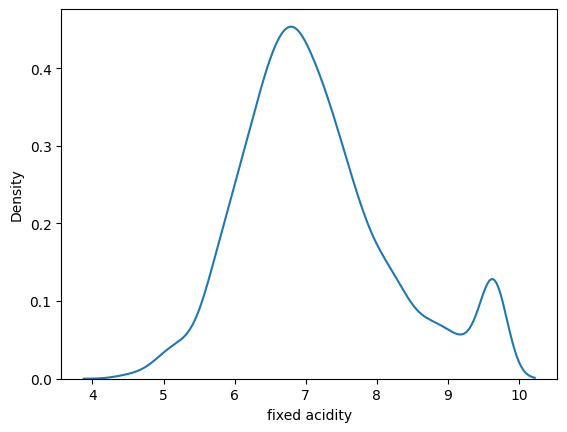

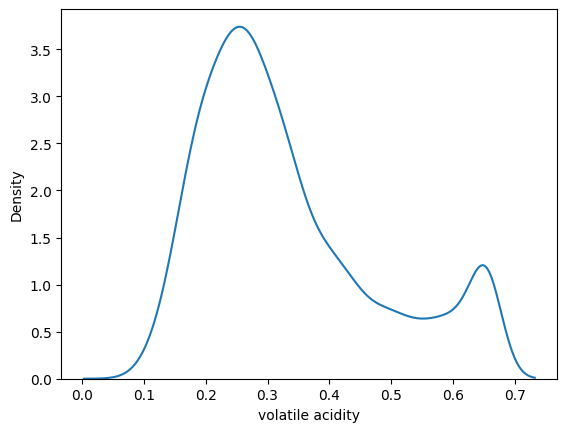

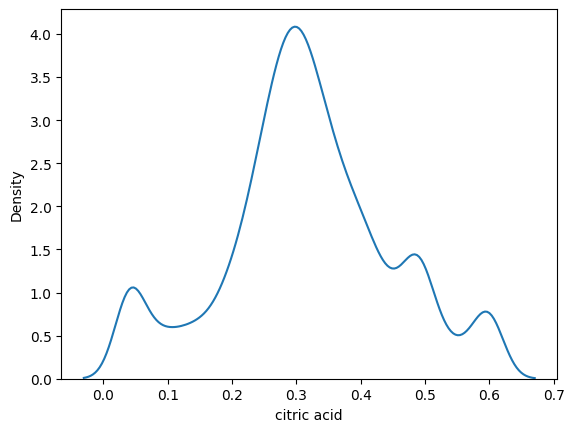

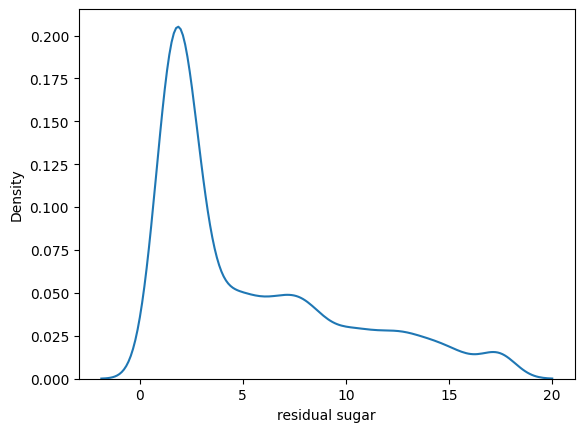

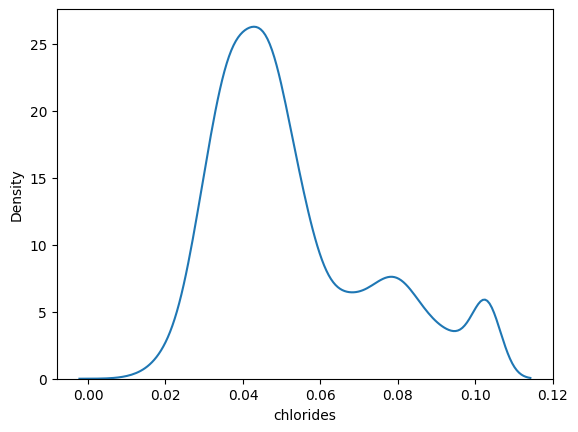

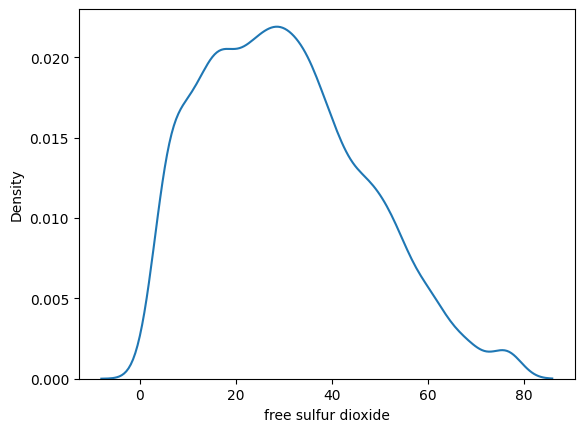

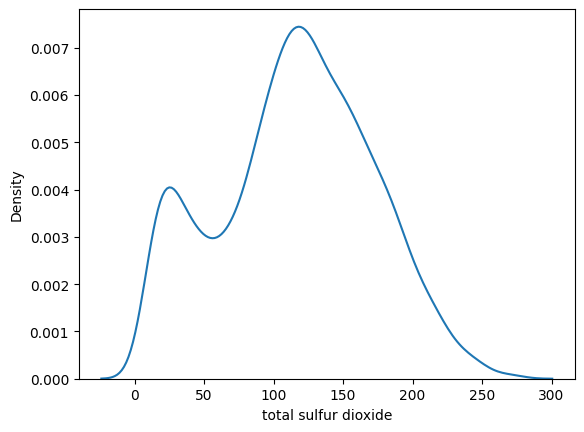

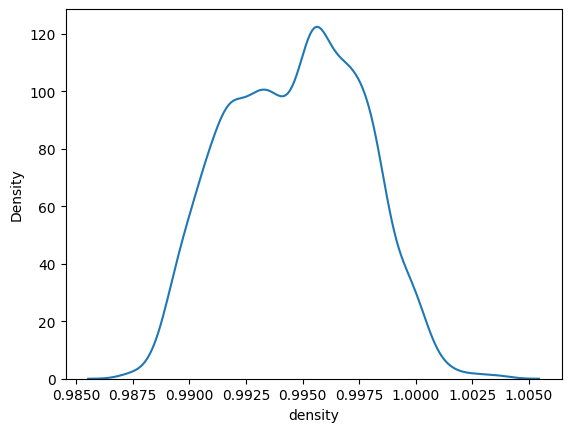

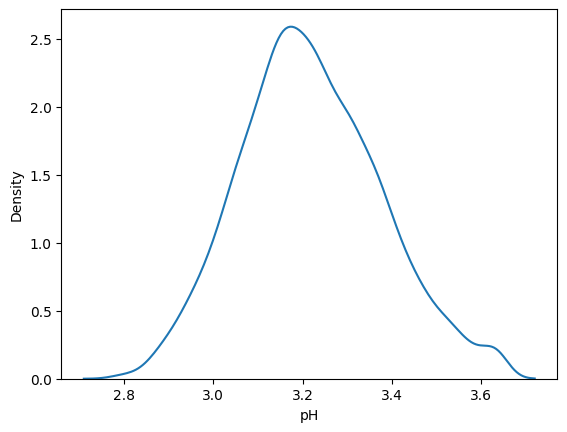

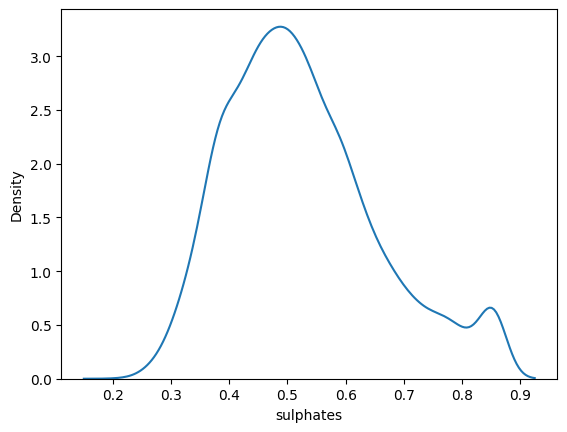

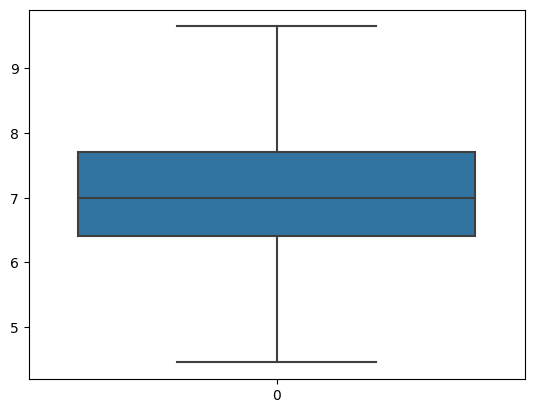

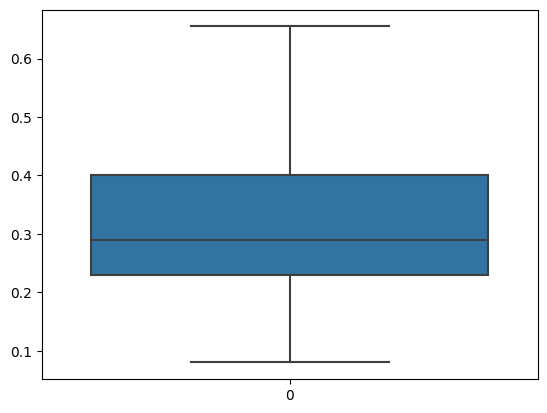

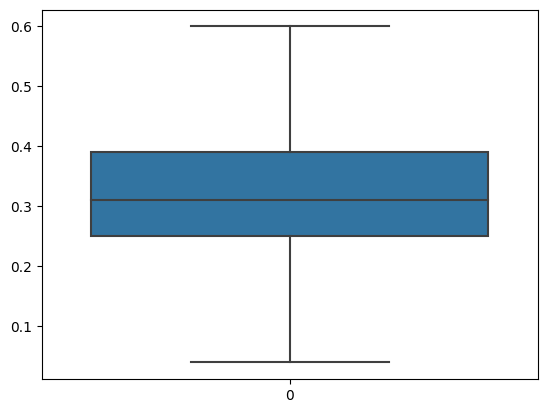

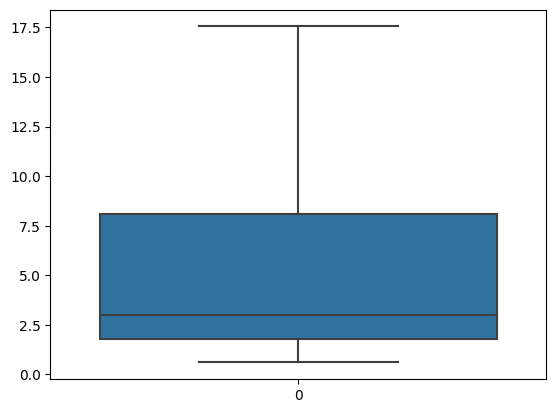

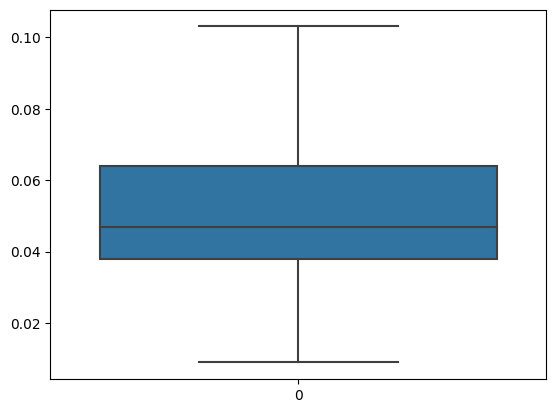

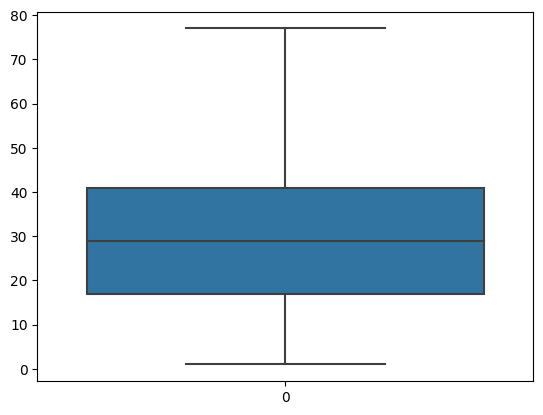

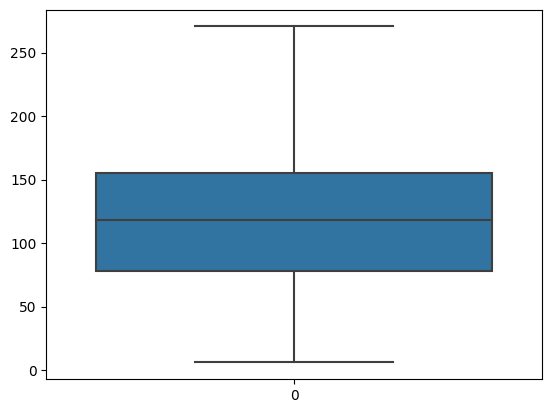

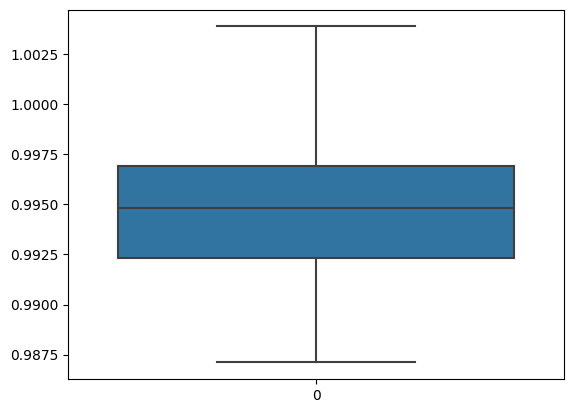

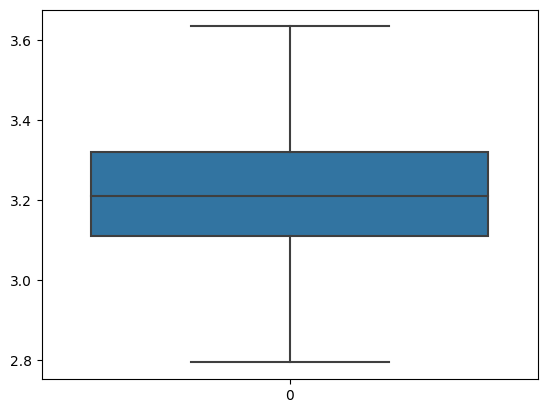

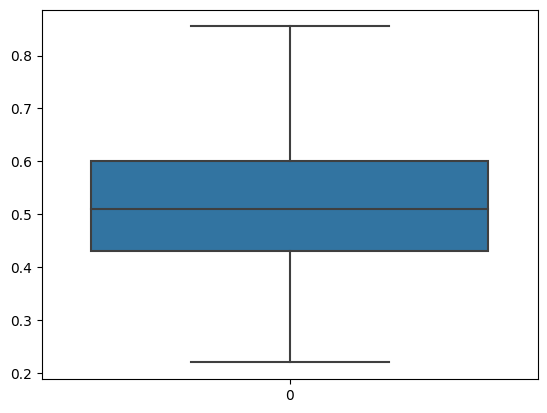

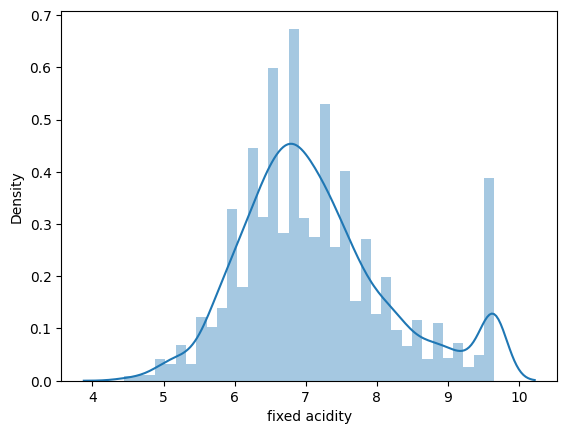

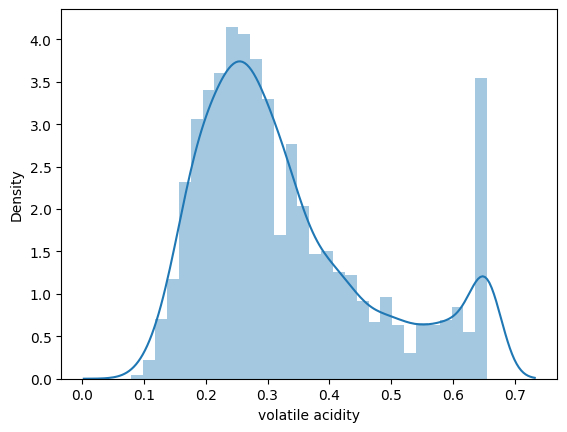

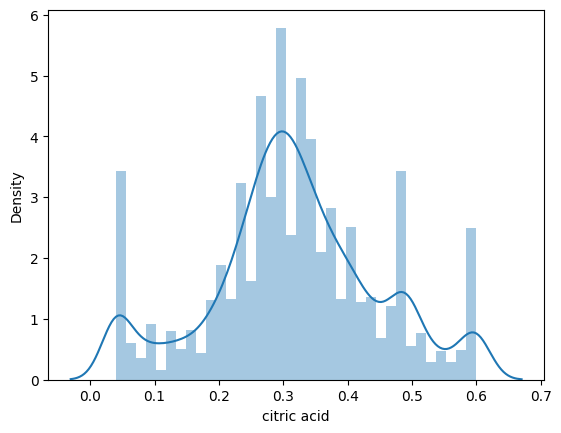

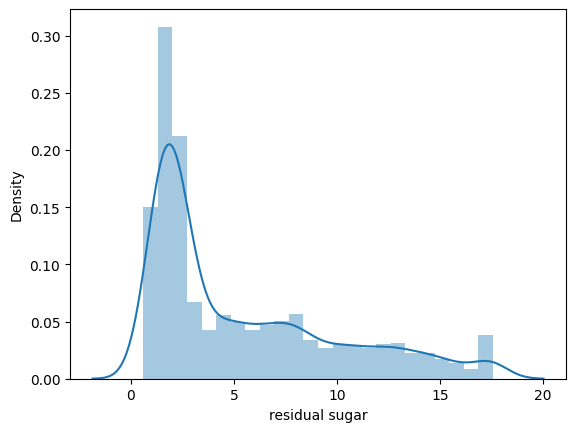

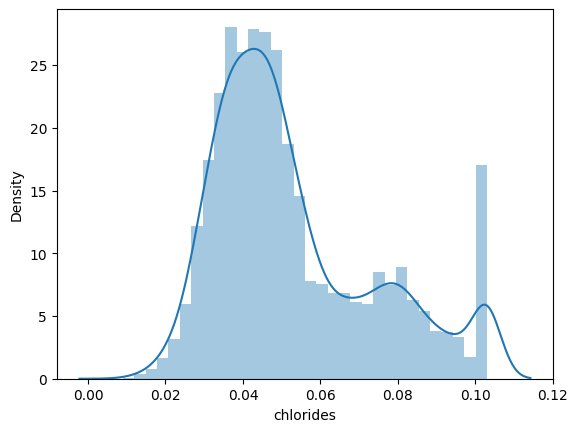

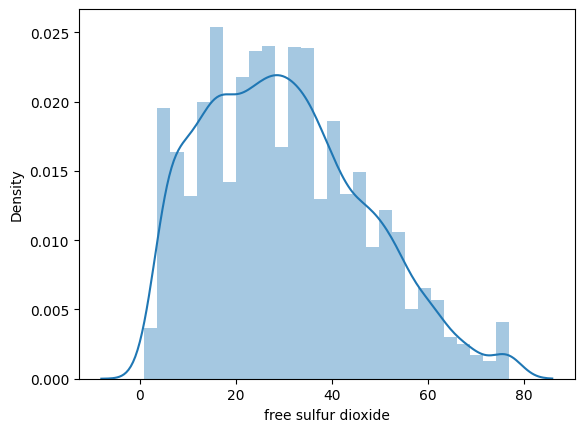

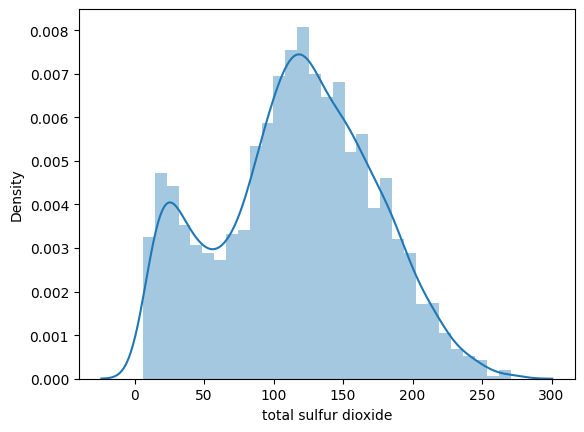

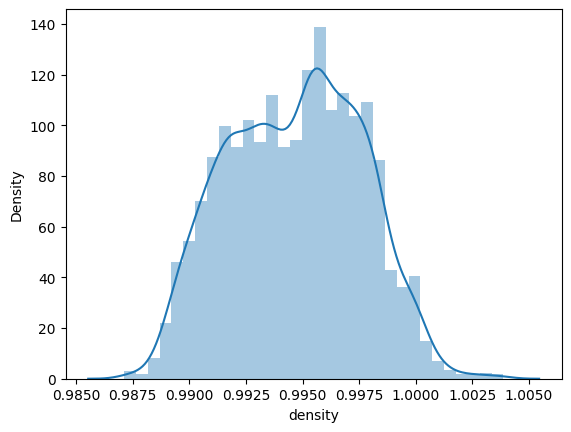

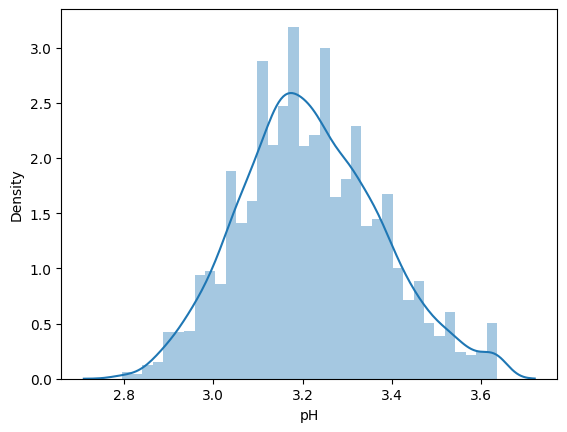

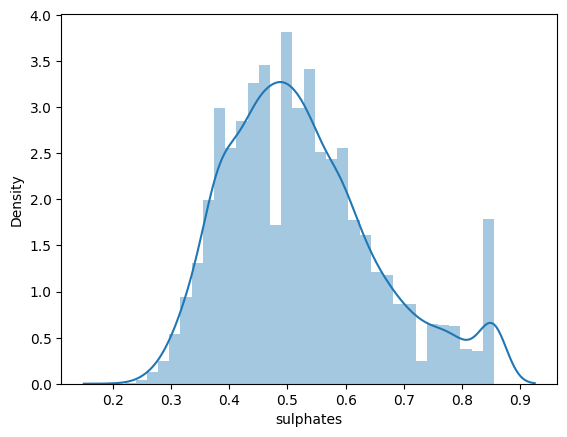

In [45]:
# 이상치 처리 후 데이터 시각화를 진행하시오
import seaborn as sns
for i in range(2,12):
   sns.kdeplot(train.iloc[:,i])
   plt.show()

# boxplot을 그려 변수별 분포를 확인하시오
for i in range(2,12):
    sns.boxplot(train.iloc[:,i])
    plt.show()

for i in range(2,12):
    sns.distplot(train.iloc[:,i])
    plt.show()




In [46]:
# train-split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.drop('type', axis=1)
y = train['type']

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=24)
print(X_train.shape)
print(y_train.shape)

(4397, 13)
(4397,)


## 모델링 진행

#### 의사결정트리(Decision Tree)

In [47]:
# 의사결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer

dt_clf = DecisionTreeClassifier(random_state = 24)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("Accuracy score of model : {0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

Accuracy score of model : 0.9773
F1 score of model : 0.9704


In [57]:
# 의사결정트리 파라미터 튜닝 - 범위를 좁혀가며 최적의 파라미터를 찾아보세요
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {'max_depth':[3,5,7,9,11],
          'min_samples_split':[ 7, 8, 10, 12]}
grid_cv = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)
dt_best = grid_cv.best_params_
print("GridSearchCV highest  mean accuracy value : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV best hyperparameter : {}".format(grid_cv.best_params_))

GridSearchCV highest  mean accuracy value : 0.9861
GridSearchCV best hyperparameter : {'max_depth': 5, 'min_samples_split': 8}


#### 랜덤 포레스트(Random Forest)

In [49]:
# RandomForest parameter 구성
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=24)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print("Accuracy score of model : {0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

Accuracy score of model : 0.9909
F1 score of model : 0.9882


In [58]:
params={'max_depth':[3, 5, 7, 9, 11],
        'min_samples_leaf':[1, 3, 5],
        'min_samples_split':[2, 5, 10]
        }
grid_cv=GridSearchCV(rf_clf, param_grid=params)
grid_cv.fit(X_train, y_train)
rf_best = grid_cv.best_params_
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터',grid_cv.best_params_)
print("f1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

GridSearchCV 최고 평균 정확도 수치: 0.9955
GridSearchCV 최적 하이퍼 파라미터 {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
f1 score of model : 0.9894


In [59]:
# RandomForest parameter 튜닝 후 값 사용
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(**rf_best, random_state=0, n_jobs=-1)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
print("Accuracy score of model : {0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

Accuracy score of model : 0.9900
F1 score of model : 0.9870


#### KNN 알고리즘

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("{0}NN Score :{1:.4f}".format(5, accuracy_score(y_test, knn_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,knn_pred,average='macro')))

5NN Score :0.8982
F1 score of model : 0.8590


In [60]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3, 5, 7, 9],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_cv = GridSearchCV(knn, param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)
knn_best = grid_cv.best_params_
print("GridSearchCV hightest mean accuracy value : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV best hyperparameter : {}".format(grid_cv.best_params_))

GridSearchCV hightest mean accuracy value : 0.9220
GridSearchCV best hyperparameter : {'algorithm': 'auto', 'n_neighbors': 9}


In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(**knn_best)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("{0}NN Score :{1:.4f}".format(2, accuracy_score(y_test, knn_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,knn_pred,average='macro')))

2NN Score :0.8955
F1 score of model : 0.8558


#### 서포트 벡터 머신 알고리즘(SVN)

In [55]:
# Support Vector Machine
from sklearn.svm import SVC

svm_clf = SVC(random_state=24)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

print("SVM Score :{0:.4f}".format(accuracy_score(y_test, svm_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,svm_pred,average='macro')))

SVM Score :0.7391
F1 score of model : 0.4250


In [65]:
svm_clf = SVC(random_state=24) # 튜닝할 모형
params= {'C': [ 0.1, 1, 10],
             'gamma': [0.1, 1, 10] }
grid_cv = GridSearchCV(svm_clf, param_grid=params)
grid_cv.fit(X_train, y_train)
svm_best = grid_cv.best_params_
print("GridSearchCV highest mean accuracy value : {}".format(grid_cv.best_score_))
print("GridSearchCV best hyperparameter : {}".format(grid_cv.best_params_))

GridSearchCV highest mean accuracy value : 0.7623384010756025
GridSearchCV best hyperparameter : {'C': 10, 'gamma': 0.1}


In [66]:
from sklearn.svm import SVC
svm_clf = SVC(**svm_best)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

print("SVM Score :{0:.4f}".format(accuracy_score(y_test, svm_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,svm_pred,average='macro')))

SVM Score :0.7400
F1 score of model : 0.4320


#### 로지스틱 회귀

In [67]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=24)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print("Logistic Score :{0:.4f}".format(accuracy_score(y_test,lr_pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,lr_pred,average='macro')))

Logistic Score :0.9309
F1 score of model : 0.9083


#### Soft Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier(**dt_best)
lr_clf = LogisticRegression(random_state=24)
rf_clf = RandomForestClassifier(**rf_best)
knn = KNeighborsClassifier(**knn_best)
svm_clf = SVC(**svm_best, probability=True)

voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('lr', lr_clf), ('rf', rf_clf), ('knn', knn), ('svm', svm_clf)], voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=8)),
                             ('lr', LogisticRegression(random_state=24)),
                             ('rf', RandomForestClassifier(max_depth=11)),
                             ('knn', KNeighborsClassifier(n_neighbors=9)),
                             ('svm', SVC(C=10, gamma=0.1, probability=True))],
                 voting='soft')

In [77]:
# Soft Voting Result
pred= voting_clf.predict(X_test)
print("Voting Accuracy Score :{0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

Voting Accuracy Score :0.9645
F1 score of model : 0.9522


### 결론